### Heart Disease Prediction

#### Importing important libraries

In [2263]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, make_scorer
from sklearn.metrics import roc_curve
data = pd.read_csv('heart disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [2265]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Checking null-values

In [2266]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [2267]:
data.target.value_counts()     #target - have disease or not (1=yes, 0=no)

1    526
0    499
Name: target, dtype: int64

### Exploratory Data Analysis

#### target count bar graph (target - have disease or not (1=yes, 0=no)

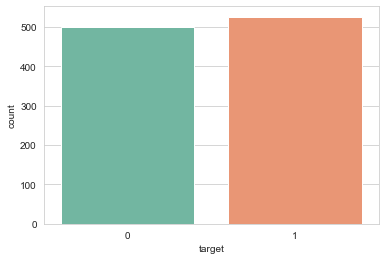

In [2268]:
sns.countplot(x="target", data=data, palette="Set2")
plt.show()

#### percentage of heart disease patients vs not having heart disease

In [2269]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Have not Heart Disease: {:.3f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.3f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients Have not Heart Disease: 48.683%
Percentage of Patients Have Heart Disease: 51.317%


#### Number of females vs number of males 

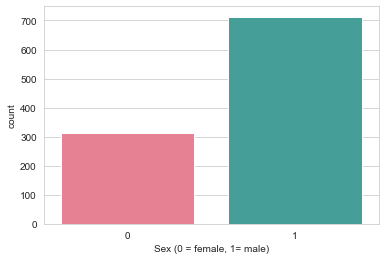

In [2270]:
sns.countplot(x='sex', data=data, palette="husl")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

#### Categorical plot( Sex vs target)

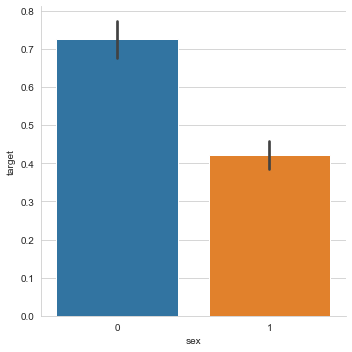

In [2271]:
sns.catplot(x="sex", y ="target", data=data, kind="bar", height=5)
plt.show()

#### Categorical plot(chest pain vs target)

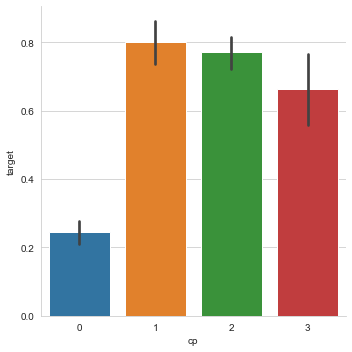

In [2272]:
sns.catplot(x="cp", y ="target", data=data, kind="bar", height=5)
plt.show()

#### Categorical plot(the slope of the peak exercise vs target)

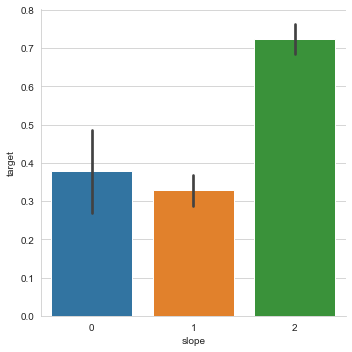

In [2273]:
sns.catplot(x="slope", y ="target", data=data, kind="bar", height=5)
plt.show()

#### Categorical plot(thalassemia vs target)

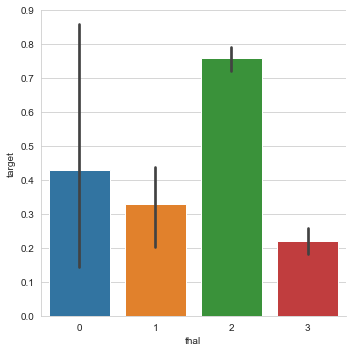

In [2274]:
sns.catplot(x="thal", y ="target", data=data, kind="bar", height=5)
plt.show()

#### Categorical plot(exercise induced angina  vs target)

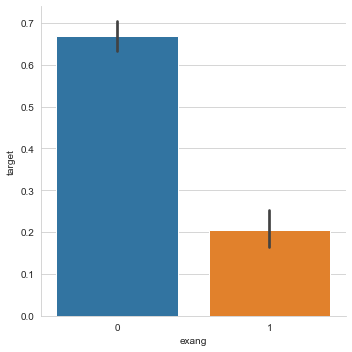

In [2275]:
sns.catplot(x="exang", y ="target", data=data, kind="bar", height=5)
plt.show()

#### Categorical plot(number of major vessels   vs target)

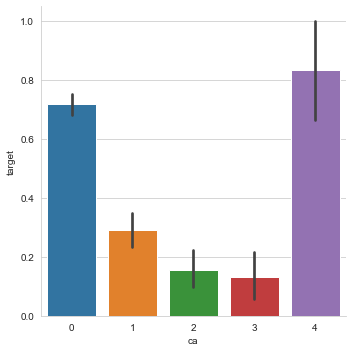

In [2276]:
sns.catplot(x="ca", y ="target", data=data, kind="bar", height=5)
plt.show()

#### Categorical plot(resting electrocardiographic results  vs target)

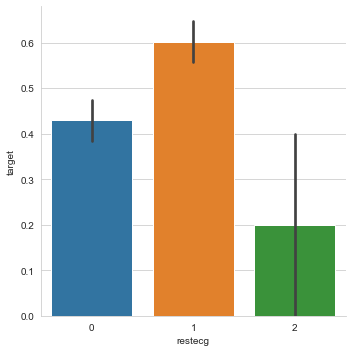

In [2277]:
sns.catplot(x="restecg", y ="target", data=data, kind="bar", height=5)
plt.show()

#### Categorical plot(fasting blood sugar  vs target)

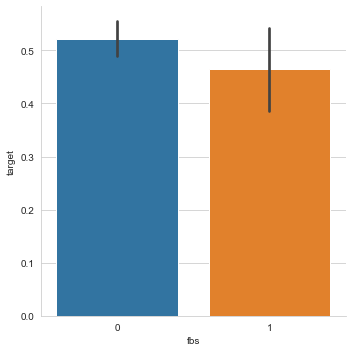

In [2278]:
sns.catplot(x="fbs", y ="target", data=data, kind="bar", height=5)
plt.show()

#### correlation is an important part of the exploratory data analysis process. This analysis is one of the methods used to decide which features affect the target variable the most, and in turn, get used in predicting this target variable. In other words, it’s a commonly-used method for feature selection in machine learning.
#### A cardiac occurs usually when blood clot blocks blood flow to the cardiac. Tissue loses oxygen without blood and dies causing chest pain.From the correlation matrix it is very clear that chest pain(cp) is highly related to target variable and that makes sense. 

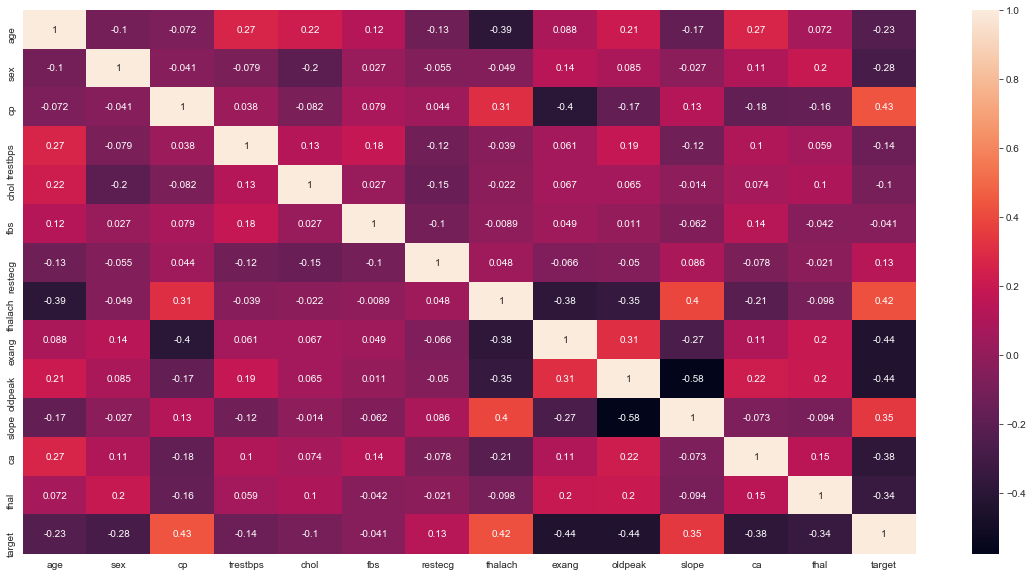

In [2279]:
plt.figure(figsize=(20,10))
sns.heatmap(data[['age','sex','cp','trestbps','chol','fbs',	'restecg','thalach','exang','oldpeak','slope','ca','thal','target']].corr(), annot = True)
plt.show()


#### The SelectKBest provided by sklearn library can be used to Select features according to the k highest scores. here I am using Chi sqaure test. It shows a relationship between two categorical variables. In statistics, there are two types of variables: numerical (countable) variables and non-numerical (categorical) variables. The chi-squared statistic is a single number that tells you how much difference exists between your observed counts and the counts you would expect if there were no relationship at all in the population.




In [2280]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df = data.copy()
X = df.iloc[:,0:13]  
y = df.iloc[:,-1] 

good_features = SelectKBest(score_func=chi2, k=10)
fit = good_features.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score'] 
print(featureScores.nlargest(12,'Score'))  


    Features       Score
7    thalach  650.008493
9    oldpeak  253.653461
2         cp  217.823922
11        ca  210.625919
8      exang  130.470927
4       chol  110.723364
0        age   81.425368
3   trestbps   45.974069
10     slope   33.673948
1        sex   24.373650
12      thal   19.373465
6    restecg    9.739343


### feature importance

[0.06894346 0.05391376 0.12327746 0.05990619 0.06206593 0.02008946
 0.03394763 0.07928641 0.10168744 0.09578364 0.06613395 0.12913237
 0.10583229]


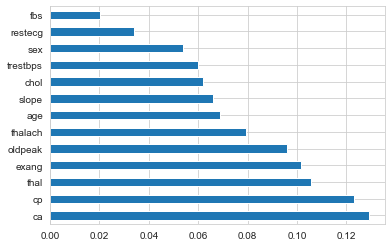

In [2281]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()


### unique columns

In [2282]:
for i in data.columns:
    print(i,len(data[i].unique()))


age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


In [2283]:
df2 = data.copy()
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)
def chng2(prob):
    if prob == 0:
        return 'No Heart Disease'
    else:
        return 'Heart Disease'
df2['target'] = df2['target'].apply(chng2)

Text(0.5, 1.0, 'Chest Pain Type vs target')

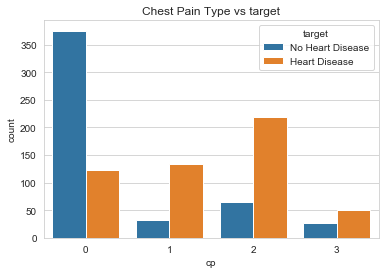

In [2284]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type vs target')



Text(0.5, 1.0, 'Gender vs Thalassemia')

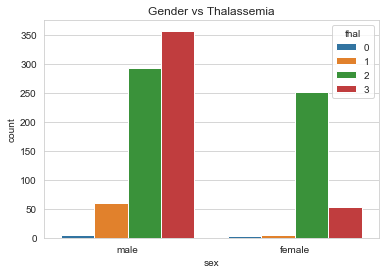

In [2285]:
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender vs Thalassemia')


Text(0.5, 1.0, 'Slope vs Target')

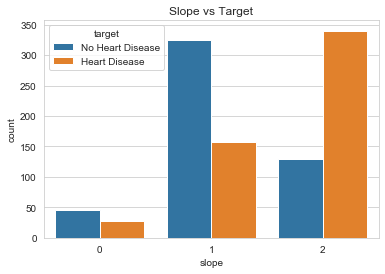

In [2286]:
sns.countplot(data= df2, x='slope',hue='target')
plt.title('Slope vs Target')


Text(0.5, 1.0, 'exang vs Thalassemia')

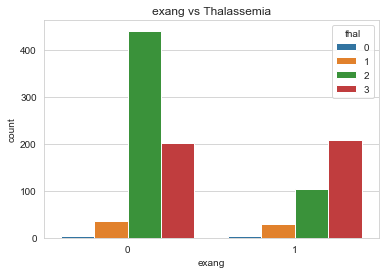

In [2287]:
sns.countplot(data= df2, x='exang',hue='thal')
plt.title('exang vs Thalassemia')


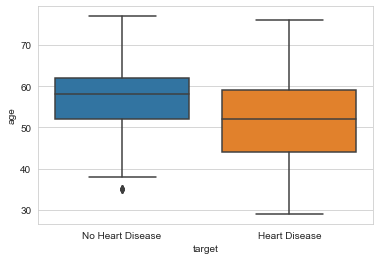

In [2288]:
sns.boxplot(data=df2,x='target',y='age')

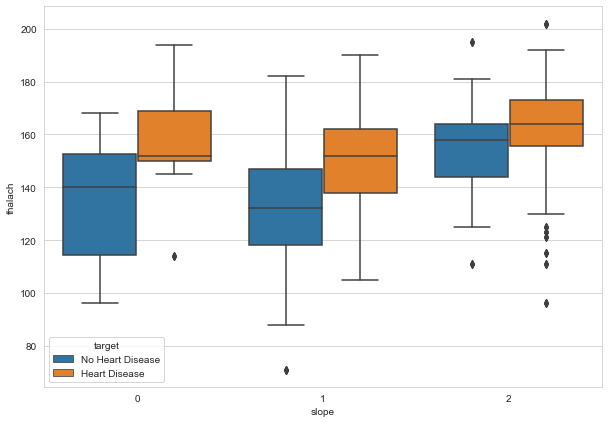

In [2289]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='slope',y='thalach',hue='target')


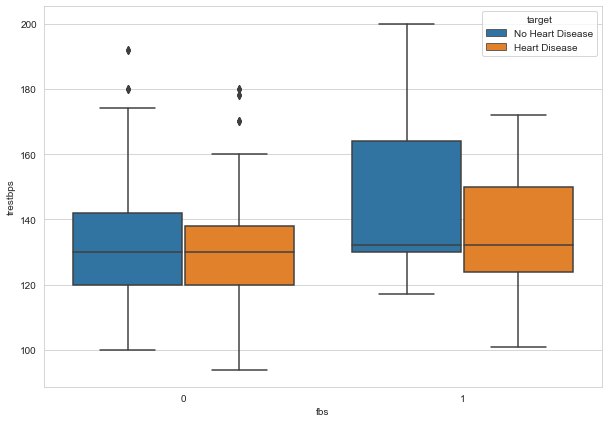

In [2290]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='fbs',y='trestbps',hue='target')

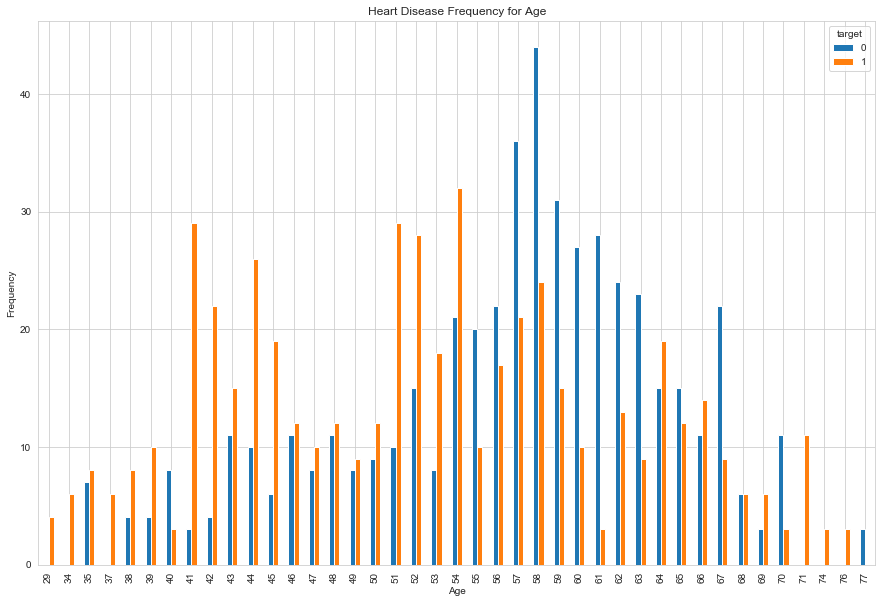

In [2291]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(15,10))
plt.title('Heart Disease Frequency for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Data Pre-proceesing

In [2292]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


Here I am changing columns abbreviations with their respective full names. it would be easier to work with full names to avoid confusion

In [2293]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']
data.columns


Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

#### In data description, I noticed we have 4 categorical columns:
#### 1.cp — chest_pain_type
#### 2.restecg — rest_ecg_type
#### 3.slope — st_slope_type
#### 4.thal — thalassemia_type
#### So now I am creating categorical columns values for each categorical column:

In [2294]:
#cp - chest_pain_type
data.loc[data['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
data.loc[data['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
data.loc[data['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
data.loc[data['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'
#restecg - rest_ecg_type
data.loc[data['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
data.loc[data['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
data.loc[data['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'
#slope - st_slope_type
data.loc[data['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
data.loc[data['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
data.loc[data['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'
#thal - thalassemia_type
data.loc[data['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
data.loc[data['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
data.loc[data['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
data.loc[data['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'


For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
1.For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
2.There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
3.For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via OneHotEncoder)

#### One hot-encoding

In [2295]:
data = pd.get_dummies(data, drop_first=False)
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed defect',
       'thalassemia_type_normal', 'thalassemia_type_nothing',
       'thalassemia_type_reversable defect'],
      dtype='object')

In [2296]:
df_temp = data['thalassemia_type_fixed defect']
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,rest_ecg_type_ST-T wave abnormality,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed defect,thalassemia_type_normal,thalassemia_type_nothing,thalassemia_type_reversable defect
0,52,1,125,212,0,168,0,1.0,2,0,...,0,0,1,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,0,1,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,1,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,0,...,0,0,1,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,...,0,0,1,0,1,0,0,1,0,0


In [2297]:
frames = [data, df_temp]
new_data = pd.concat(frames,axis=1)
new_data.drop('thalassemia_type_nothing',axis=1,inplace=True)
result= new_data.copy()

In [2298]:
X = new_data.drop('target', axis = 1)
y = new_data['target']

#### Splitting the data into training and test data into 80 % and 20 % respectively.

In [2299]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

#### Data Normalization:Min-Max Normalization method is used to Normalize the data. This method scales the data range to [0,1]. Standardization is also used on a feature-wise basis in most cases.

In [2300]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

#### Models implementation

#### 1. Support vector Classifier

In [2301]:
accuracies = {}
model_1 =SVC()
model_1.fit(X_train,y_train)
acc =model_1.score(X_test,y_test)*100
accuracies['Support Vector Classifier'] = acc
print("Test Accuracy {:.2f}%".format(acc))


Test Accuracy 92.20%


In [2302]:
y_pred= model_1.predict(X_test)
print("The accuracy score is", accuracy_score(y_test, y_pred) * 100)

The accuracy score is 92.19512195121952


In [2303]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        98
           1       0.91      0.94      0.93       107

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



[[ 88  10]
 [  6 101]]


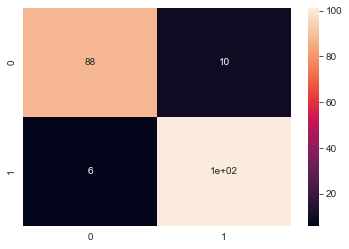

In [2304]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
print(confusion_matrix(y_test,y_pred))


### Support Vector Classifier ROC curve for heart disease

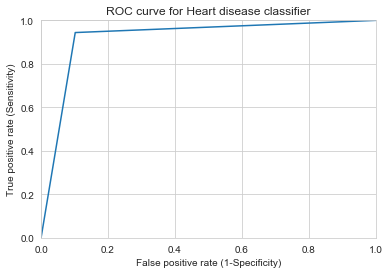

In [2305]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)


#### 2. Naive Bayes Classifier

In [2306]:
from sklearn.naive_bayes import GaussianNB
model_2 = GaussianNB()
model_2.fit(X_train, y_train)
acc = model_2.score(X_test,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))


Accuracy of Naive Bayes: 87.80%


In [2307]:
y_pred= model_2.predict(X_test)
print("The accuracy score is", accuracy_score(y_test, y_pred) * 100)

The accuracy score is 87.8048780487805


In [2308]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        98
           1       0.87      0.91      0.89       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



#### NB classifier Confusion matrix 

[[83 15]
 [10 97]]


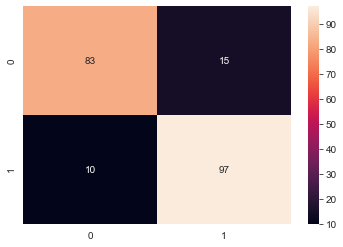

In [2309]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


#### NB classifier ROC curve

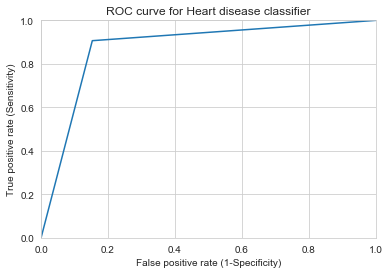

In [2310]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)


#### 3. Logistic Regression

In [2311]:
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression()
model_3.fit(X_train,y_train)
acc = model_3.score(X_test,y_test)*100
accuracies['Logistic Regression'] = acc
print("Accuracy of Logistic Regression: {:.2f}%".format(acc))


Accuracy of Logistic Regression: 84.39%


In [2312]:
y_pred= model_3.predict(X_test)
print("The accuracy score is", accuracy_score(y_test, y_pred) * 100)

The accuracy score is 84.39024390243902


In [2313]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83        98
           1       0.84      0.87      0.85       107

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



#### Logistic Regression Confusion Matrix

[[80 18]
 [14 93]]


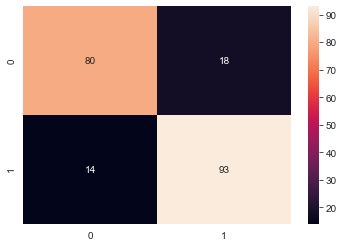

In [2314]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


#### Logistic Regression ROC Curve

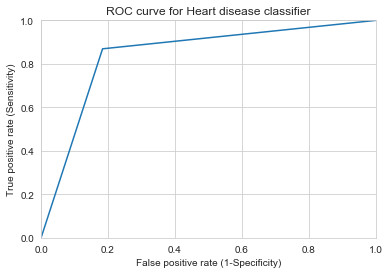

In [2315]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)


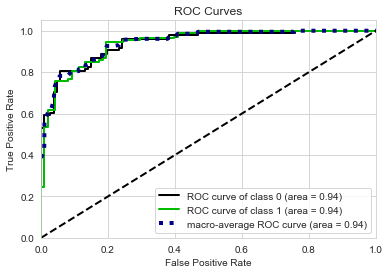

In [2316]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test,model_3.predict_proba(X_test), plot_micro = False)
plt.show()

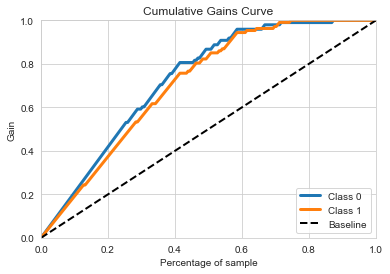

In [2317]:
skplt.metrics.plot_cumulative_gain(y_test, model_3.predict_proba(X_test))
plt.show()

### 4. Random Forest

In [2318]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth=4)
random_forest.fit(X_train, y_train)
acc = random_forest.score(X_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 90.24%


In [2319]:
y_pred= random_forest.predict(X_test)
print("The accuracy score is", accuracy_score(y_test, y_pred) * 100)

The accuracy score is 90.2439024390244


In [2320]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        98
           1       0.88      0.93      0.91       107

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



#### Random forest confusion matrix

[[ 85  13]
 [  7 100]]


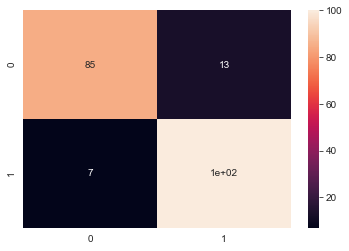

In [2321]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


#### Random Forest ROC curve

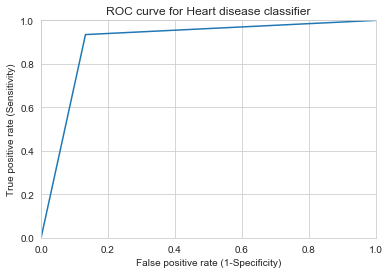

In [2322]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)


#### Logistic Regression Coefficient for feature selection

In [2323]:
print(model_3.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(model_3.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients


[2.12343794]


,Coeffecient
max_heart_rate_achieved,1.422019
thalassemia_type_normal,0.711627
chest_pain_type_non-anginal pain,0.640353
rest_ecg_type_normal,0.518701
chest_pain_type_typical angina,0.480378
st_slope_type_upsloping,0.358728
thalassemia_type_fixed defect,0.353587
thalassemia_type_fixed defect,0.353587
st_slope_type_downsloping,0.114806
fasting_blood_sugar,0.076406


<Figure size 720x864 with 0 Axes>

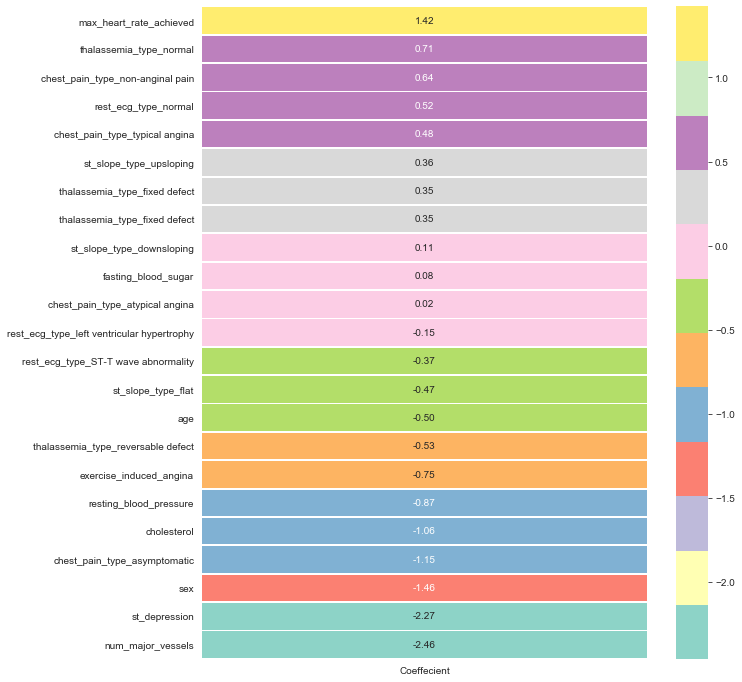

In [2324]:
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(model_3.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
sns.heatmap(coeffecients,annot=True,fmt='.2f',cmap='Set3',linewidths=0.8)

#### The important features contributing to the accuracy of the prediction are shown through the Heatmap in descending order. In yellow color code, the most contributing feature, the  maximum heart rate achieved proved to be more valuable by 1.42 unit.

### Models comparison with all features

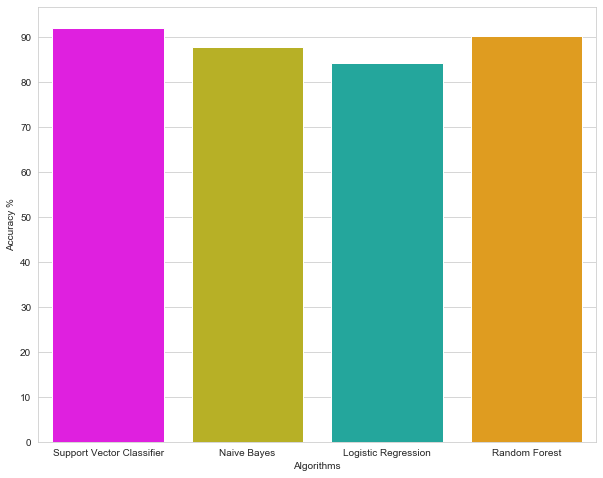

In [2325]:
colors = [ "magenta","#CFC60E","#0FBBAE","orange"]
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [2326]:
from scipy import stats
stats.pearsonr(predicted, expected)


(0.6871914154537289, 5.447653139891146e-30)

#### A Novel Approach to Feature Importance — Shapley Additive
#### These plots tell us which features are the most important for a model and hence, we can make our machine learning models more interpretable and explanatory.

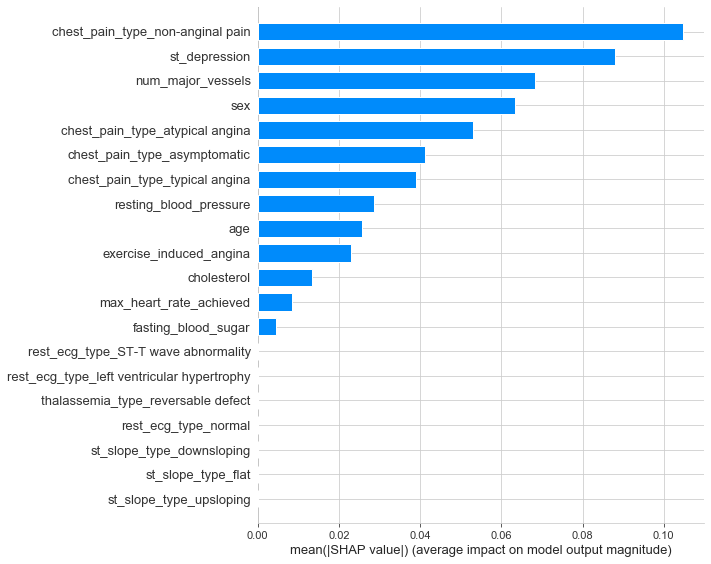

In [2327]:
import warnings
warnings.filterwarnings('ignore')
!pip install shap 
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test,check_additivity=False)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

### Selected features

In [2328]:
input_data = pd.DataFrame(data,columns=['max_heart_rate_achieved','fasting_blood_sugar','chest_pain_type_atypical angina','rest_ecg_type_left ventricular hypertrophy','age','rest_ecg_type_ST-T wave abnormality','exercise_induced_angina','resting_blood_pressure', 'cholesterol','sex','st_depression','chest_pain_type_asymptomatic','st_slope_type_upsloping','st_slope_type_flat','st_slope_type_downsloping','thalassemia_type_fixed defect','thalassemia_type_reversable defect','target'])
input_data


,max_heart_rate_achieved,fasting_blood_sugar,chest_pain_type_atypical angina,rest_ecg_type_left ventricular hypertrophy,age,rest_ecg_type_ST-T wave abnormality,exercise_induced_angina,resting_blood_pressure,cholesterol,sex,st_depression,chest_pain_type_asymptomatic,st_slope_type_upsloping,st_slope_type_flat,st_slope_type_downsloping,thalassemia_type_fixed defect,thalassemia_type_reversable defect,target
0,168,0,0,0,52,0,0,125,212,1,1.0,1,1,0,0,0,1,0
1,155,1,0,1,53,0,1,140,203,1,3.1,1,0,0,1,0,1,0
2,125,0,0,0,70,0,1,145,174,1,2.6,1,0,0,1,0,1,0
3,161,0,0,0,61,0,0,148,203,1,0.0,1,1,0,0,0,1,0
4,106,1,0,0,62,0,0,138,294,0,1.9,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,164,0,1,0,59,0,1,140,221,1,0.0,0,1,0,0,0,0,1
1021,141,0,0,1,60,0,1,125,258,1,2.8,1,0,1,0,0,1,0
1022,118,0,0,1,47,0,1,110,275,1,1.0,1,0,1,0,0,0,0
1023,159,0,0,1,50,0,0,110,254,0,0.0,1,1,0,0,0,0,1


In [2329]:
X = input_data.drop('target', axis = 1)
y = input_data['target']

In [2330]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

#### 1. Support Vector Classifier

In [2331]:
from sklearn.svm import SVC
accuracies = {}
svm_model =SVC()
svm_model.fit(X_train,y_train)
acc = svm_model.score(X_test,y_test)*100
accuracies['Support Vector Classifier'] = acc
print("Test Accuracy {:.2f}%".format(acc))


Test Accuracy 74.15%


In [2332]:
y_pred= svm_model.predict(X_test)
print("The accuracy score is", accuracy_score(y_test, y_pred) * 100)

The accuracy score is 74.14634146341463


In [2333]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71        98
           1       0.72      0.81      0.77       107

    accuracy                           0.74       205
   macro avg       0.74      0.74      0.74       205
weighted avg       0.74      0.74      0.74       205



[[65 33]
 [20 87]]


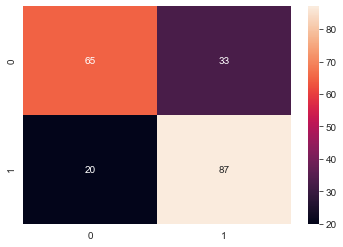

In [2334]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


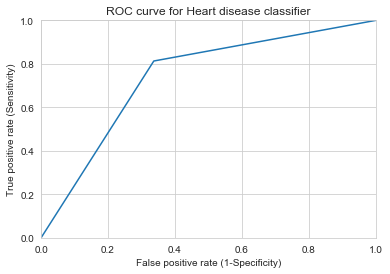

In [2335]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)


#### 2. Naive Bayes Classifier

In [2336]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
acc = nb_model.score(X_test,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 83.41%


In [2337]:
y_pred= nb_model.predict(X_test)
print("The accuracy score is", accuracy_score(y_test, y_pred) * 100)

The accuracy score is 83.41463414634146


In [2338]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        98
           1       0.83      0.86      0.84       107

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



[[79 19]
 [15 92]]


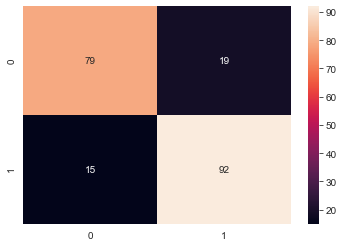

In [2339]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


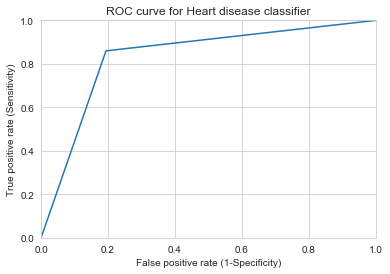

In [2340]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)


#### 3. Logistic Regression

In [2341]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
acc = lr_model.score(X_test,y_test)*100
accuracies['Logistic Regression'] = acc
print("Accuracy of Logistic Regression: {:.2f}%".format(acc))


Accuracy of Logistic Regression: 83.90%


In [2342]:
y_pred= lr_model.predict(X_test)
print("The accuracy score is", accuracy_score(y_test, y_pred) * 100)

The accuracy score is 83.90243902439025


In [2343]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        98
           1       0.83      0.87      0.85       107

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



[[79 19]
 [14 93]]


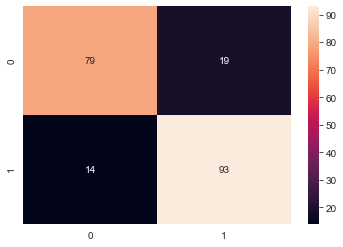

In [2344]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


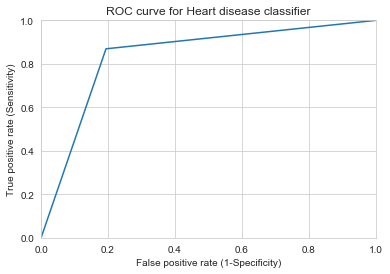

In [2345]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)


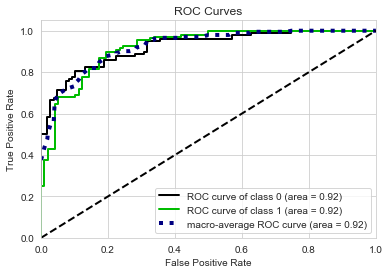

In [2346]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, lr_model.predict_proba(X_test), plot_micro = False)
plt.show()

#### 4. Random Forest Classifier

In [2347]:
from sklearn.ensemble import RandomForestClassifier
random_forest_1 = RandomForestClassifier(n_estimators = 100, random_state = 0,max_depth = 4)
random_forest_1.fit(X_train,y_train)
acc = random_forest_1.score(X_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Accuracy Score : {:.2f}%".format(acc))

Random Forest Accuracy Score : 91.22%


In [2348]:
y_pred= random_forest_1.predict(X_test)
print("The accuracy score is", accuracy_score(y_test, y_pred) * 100)

The accuracy score is 91.21951219512195


In [2349]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        98
           1       0.92      0.92      0.92       107

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



[[89  9]
 [ 9 98]]


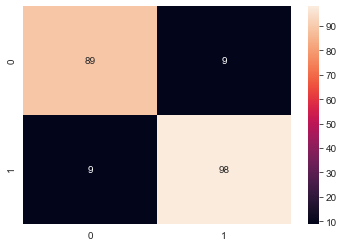

In [2350]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


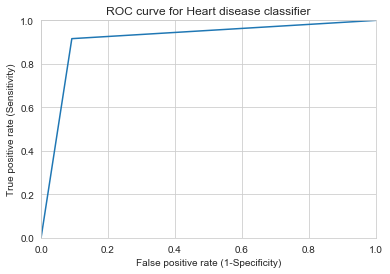

In [2351]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)


#### Models comparison with selected features

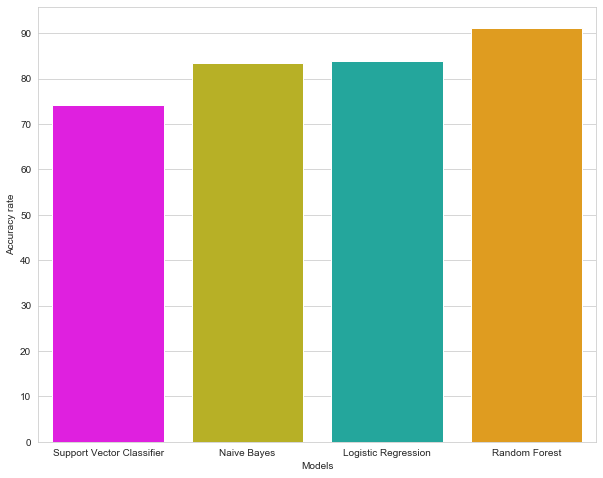

In [2352]:
colors = [ "magenta","#CFC60E","#0FBBAE","orange"]
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy rate")
plt.xlabel("Models")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()